In [1]:
from pdb import run
from fff.simulation import run_calculator
from fff.simulation.utils import read_from_string, write_to_string
from _pytest.fixtures import fixture
import ase
from ase.build import molecule
from dataclasses import dataclass
from pathlib import Path
from typing  import Dict, Any, List, Optional
import os
import psutil
from functools import partial, update_wrapper
import json
import pickle
import time
import multiprocessing as mp
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import math

import sys
sys.path.append('../../multisite_')
# sys.path.append('../my_util')
from colmena.queue.evo_sch import *
from colmena.models import Result, ResourceRequirements
from my_util.data_structure import *

# import logging
# from IPython.display import display
# logger = logging.getLogger()
# logger.setLevel(logging.INFO)  # 设置日志级别为 INFO 或其他你想要的级别

# class JupyterHandler(logging.Handler):
#     def emit(self, record):
#         display(self.format(record))

# handler = JupyterHandler()
# handler.setLevel(logging.INFO)  # 设置处理程序的日志级别
# logger.addHandler(handler)

        
        


In [2]:
task_nums = 3
class test_queue:
    def __init__(self, task_nums) -> None:
        self.available_resources = {"node1":{"cpu":56,"gpu":4},"node2":{"cpu":56,"gpu":4}}
        self.result_list = {}
        self.methods = {'train', 'evaluate', 'run_calculator', 'run_sampling'}
        self._hist_data = historical_data(methods=self.methods, queue=self)
        available_tasks = {}
        for method in self.methods:
            available_tasks[method] = []
        self._available_tasks = available_task(available_tasks)
        self.evosch = evosch2(resources=self.available_resources, at = self._available_tasks, hist_data=self._hist_data)
    
        with open("/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/hist_data/task_queue_audit.pkl",'rb')as f:
            task_queue_audit = pickle.load(f)
        # for to_run in task_queue_audit:
        for i in range(task_nums):
            to_run = task_queue_audit[i]
            task_type = 'audit'
            atoms = to_run.atoms
            atoms.set_center_of_mass([0,0,0])
            xyz = write_to_string(atoms, 'xyz')
            input_args = (xyz,)
            input_kargs = {}
            result = Result(
                (input_args,input_kargs), 
                method='run_calculator', 
                topic='simulate',
                keep_inputs = True,
                serialization_method='pickle',
                task_info={'traj_id': to_run.traj_id, 'task_type': task_type,
                                        'ml_energy': to_run.ml_eng, 'xyz': xyz},
                resources=ResourceRequirements(cpu=8, gpu=0, node="all")
                
            )
            result.serialize()
            self.result_list[result.task_id] = result
            self._available_tasks.add_task_id(task_name="run_calculator", task_id=result.task_id)
                
    
hist_path = [] 
hist_path.append("/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/hist_data/simulation-results-20240319_230707.json")
hist_path.append("/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/hist_data/inference-results-20240319_230707.json")
hist_path.append("/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/hist_data/sampling-results-20240319_230707.json")
hist_path.append("/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/hist_data/training-results-20240319_230707.json")

tq = test_queue(task_nums=task_nums)
tq._hist_data.get_features_from_his_json(hist_path)

print(tq._hist_data.queue)
print(tq.evosch.at.get_all())
# tq.evosch.population = tq.evosch.generate_population(100)
# predifine_ind = tq.evosch.population[-1]
# print(predifine_ind.task_allocation)
# measure time consume
start_time = time.time()
task_allocation = tq.evosch.run_ga()
print(task_allocation)
end_time = time.time()
running_time = end_time - start_time

print(f"GA running_time:{running_time}")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'run_sampling': [], 'train': [], 'run_calculator': ['81302775-4b94-45af-a826-6c67e1a3832c', 'bb95c5c7-1e64-492f-b0b9-c844f2657533', 'fff2f0ca-e674-48bc-b819-3386dd2dbbb8'], 'evaluate': []}
Current memory usage: 264.76 MB
After cleaning memory usage: 264.71 MB
Current memory usage: 268.77 MB
After cleaning memory usage: 266.73 MB
Current memory usage: 266.92 MB
After cleaning memory usage: 266.87 MB
[{'name': 'run_calculator', 'task_id': 'fff2f0ca-e674-48bc-b819-3386dd2dbbb8', 'resources': {'cpu': 10, 'gpu': 0, 'node': 'node1'}, 'total_runtime': 184.67668280636332}, {'name': 'run_calculator', 'task_id': 'bb95c5c7-1e64-492f-b0b9-c844f2657533', 'resources': {'cpu': 10, 'gpu': 0, 'node': 'node2'}, 'total_runtime': 112.87327722995775}, {'name': 'run_calculator', 'task_id': '81302775-4b94-45af-a826-6c67e1a3832c', 'resources': {'cpu': 8, 'gpu': 0, 'node': 'node1'}, 'total_runtime': 155.9388718677948}]
GA running_time:3.3237414360046387


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'evaluate': [], 'run_calculator': ['7d80cabd-6006-463c-b7cb-dc4fc64979eb', 'a1c9b1bd-ce78-436d-844d-f9a901f4576d', '9a81ffbe-e9bf-4841-9b79-62c78c6aff85', '23f977dc-bf86-4b05-9e5b-dc044934f29f', 'e39581ea-5d33-4ef1-a6e4-aea9a8beb8b6', '830a8545-431f-4f82-9a9a-57be8277f811', 'ffddacfc-650d-4b29-96dc-0b3cb72c039f', 'e9f4aa55-8645-476a-8aa4-01acfc3acba0', 'e9b327b6-c3a3-4cf7-9205-e71d6ce738f4', '7ee044e6-ab47-4f5b-b7b8-990fae158a45'], 'train': [], 'run_sampling': []}
Current memory usage: 227.63 MB
After cleaning memory usage: 227.62 MB
Current memory usage: 227.77 MB
After cleaning memory usage: 227.71 MB
Current memory usage: 227.80 MB
After cleaning memory usage: 227.72 MB
Current memory usage: 227.74 MB
After cleaning memory usage: 227.70 MB
[{'name': 'run_calculator', 'task_id': 'ffddacfc-650d-4b29-96dc-0b3cb72c039f', 'resources': {'cpu': 6, 'gpu': 0, 'node': 'node1'}, 'total_runtime': 167.66169149612543}, {'name': 'run_calculator', 'task_id': 'e39581ea-5d33-4ef1-a6e4-aea9a8beb8b6',

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'evaluate': [], 'train': [], 'run_calculator': ['4e33df2a-6aec-4ceb-aea8-76530e8b6280', '34394039-c421-4d91-9fcf-23fdf8317aef', 'bc1642c2-ca66-4e16-8f33-ecd4563fabdc', 'ac30974d-277e-4db2-a2c4-35077e1983ce', 'f773c997-b632-4a0b-bc3a-3edf4533f35d', '1e25e3bd-5e1b-4e66-a867-e72128989f14', '4dffc56d-1cfb-4a50-9206-892e3799490f', 'a9da6f18-e80b-4388-a106-6be59a8265f7', 'ab65261a-361c-4abf-9837-75d33ec9b600', '8e0fa6eb-e5f0-40bd-88a8-a26f724db016', '1da93f46-78d5-4600-8b5c-c9c798cb7f62', 'bfbecdfa-3e9f-4342-90e1-96e1cb6b478e', 'e4bd8d27-7943-458c-a8af-03e89296b51b', '207a4ec5-6a45-4525-8bc2-becb75b17588', '58a2e8b1-d85d-420e-a33a-b66d37993acb', 'd1f1b3f9-2323-4da5-9c60-c2447590f310', 'e2d11977-7e17-4cef-b1d6-2cea8b2c6fb6', '2860df1c-ac3a-4367-8fb5-87ee8d85c0ab', '11a8792c-c943-4b5b-9597-af1b5b4ebe61', '82f6b8cd-a66f-4d48-8dc5-4f4c39809296'], 'run_sampling': []}
Current memory usage: 230.68 MB
After cleaning memory usage: 230.65 MB
Current memory usage: 230.71 MB
After cleaning memory usage

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'train': [], 'evaluate': [], 'run_calculator': ['dee569a7-7bfa-480c-971c-0a0655155f6c', '4c8a9e56-21e5-42f5-b69b-bc4cbaee1ce2', 'bc435dc1-e7ed-41a1-81c8-f39f43fd3e45', '7504d534-6d5b-46e9-9268-0659b2553d1d', '13f66503-e678-4cd4-b625-045bbecdcf95', '70be4868-a7c6-4685-89e8-cdbe87aa7622', '452810d9-3aec-4ad6-9e33-e9e3a96261d2', '68cfcec6-e496-46cb-993d-9de9337146af', '6c2dd7c7-8809-45f4-82a0-05bb41b5f37b', '510e8eff-b6d0-4b6a-9ec4-05e8240380fc', 'd892750e-f01f-4183-87af-4fd23de7c00e', '877aea43-e805-4437-a103-dea079c8a9b3', '5bcef8e2-9574-469f-a808-45e218e0534b', '5f9d6f27-a7fe-4700-b0ed-f631d3564d9b', 'b7845fb8-0ab6-41c4-9d6c-0279d61825c8', '212a1e5b-3dc5-4882-9eb4-6fe410f714a9', '2167b079-d3c6-495e-a716-4d8018da0fcc', '3b56510b-2b19-48d2-b413-2a9bc3a2644c', '22595441-0e69-4e0f-acf1-3a2d997b6552', 'aa899642-db53-4c7a-ae14-40c7f6f25a7a', 'b81945bc-0260-4b76-9f87-6d650f5897a8', '00ee0fe1-0106-4c8e-84f3-8e380240f83b', '04068710-b242-4510-aba5-f1f7678b85fe', '665076e4-6ce3-4178-b0eb-05a70e

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'train': [], 'evaluate': [], 'run_sampling': [], 'run_calculator': ['ad85bd88-7110-4304-8aec-0bdeb8cd9de1', '547360da-80dc-4d55-a00a-d2c6008845d5', '9f2b2825-e98c-4c90-9265-3e17be20a506', 'b994d2f5-6c27-4772-af43-9eea17acd533', '59be4f8a-ed72-4654-be00-028411292773', 'c362dc93-c310-49e8-b6d4-72c303590298', 'c15f7445-2d7f-4946-b148-5734e105a95a', 'a34fc0aa-fd3f-4de9-ae39-6c94d040b1d3', '640c504b-7949-4522-84c3-3c9885057468', '25b14677-236d-421e-afca-7159d8184a28', '18de967b-961a-458d-914e-f1826aa0f5ca', '1d59bc9c-259f-4f61-8575-88496a5462ee', '7cbd44d1-a8d2-45b0-ac17-692da5f0e1be', '8ec97fbe-045b-4952-b972-5cf3c2dbefb0', '99d00191-1a2b-46bb-a194-123dbdd75e53', 'd4e95462-9dc9-4d68-89b2-6f421f261971', '1eaa0452-ff33-4fc5-bc86-66c707855f6c', '45fa8d5a-a962-4c62-9df4-b976f48ce1d1', '07a87747-227f-455f-873e-9593acaad9f5', '9c77e01b-5b1d-4b30-ad32-aac9fe31d07d', '0ebd3633-1838-406b-abe5-10e465447b1a', 'ee7a6522-d1c1-47b7-8730-fb95d12d46cc', '156a5580-f8b1-4a0c-b6b0-d835b37c0431', '740ec2b7-d

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'train': [], 'evaluate': [], 'run_calculator': ['c1390f5b-8fc0-4569-ac44-5cb0ff08f850', '73c2950e-3e91-4a00-9c24-c65ca92b1c3c', '34091d0d-851a-4e3f-98e1-ed5563b9a3a2', '590f2cc1-da6d-43c0-84d6-aca774ed1eb9', '34549967-4617-4f1d-a306-a444a0dd7006', 'f2c6fea9-b5dd-4237-9502-12c35396ee9c', '8547e5aa-bee5-459a-aff2-1880b2578efd', '67acc534-a902-4838-8971-dc73ae4ca1e3', 'f753a1d6-9a87-4f41-9df9-d3a9e7001915', '9776b3e8-0554-4630-9bdd-52afa65cff49', 'e507ec6c-134d-4a7e-8a46-95500ce380ac', 'eeb893ce-971c-49c8-b58b-a91ea5bed021', 'c57d1e13-6a1e-4721-a1f9-883e9dfd17b5', '66c82ef6-0ee4-4081-9a70-0ce2d1be791e', '44989637-83ad-411d-98d5-e1ec9f14428e', 'ec4beaa7-ae5a-49b6-ba61-2bd180f4f310', '36deff33-0475-40b8-9dec-e5a5e0230660', '3e429282-1ee9-4ccf-a094-e9d6879d7b24', '84487538-1838-4833-a4e8-46ff5a9e481a', '6f0be687-620b-4596-afea-1b557c1312ba', '1b3220e0-95a0-416e-8cfc-6f69a30a9dd8', '12e7e67c-1bd6-4ac4-8373-af503819a3d4', '0549d6d3-4b0d-47cb-aa6f-c0e04fa4ab8c', '4b82bf31-6105-4707-8395-297000

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'train': [], 'run_sampling': [], 'evaluate': [], 'run_calculator': ['dfbba4c2-7e98-46cf-a2a3-f5977f8057db', '9b248c84-e10a-4179-8072-02861b3fea63', '29c9e014-2cb5-4642-93e0-bb8bdfbdd12f', 'b30a5a7c-fa88-47e1-9e83-c4984fc9207c', '1ced619f-916f-4bd7-9861-d9e2cdd1d346', '8f2ef190-1dca-44e2-a3f7-b132189989df', '55d43d5a-f887-4c07-9e31-b1e6b0219ec9', '8bde751b-bf5e-4374-970f-720b5ac17993', 'c2b28471-ba77-497b-9eac-77e6479f9807', '1f684705-519c-4e79-af6a-430ec8375c48', 'b1236932-597e-4eca-8782-ac267296f867', '314e9418-80b8-40d6-9741-1772c500b286', '430706ca-0a64-48e4-aa06-9c8bec6d00a1', 'a908a4c0-f573-4e80-a67c-e2a54d6afdad', '7d086778-046e-46d4-90d6-1beb73d3e09f', '817a2b1c-0dbb-4a29-b6c9-abdccfbfbade', '3dc3521f-195e-49c3-b960-25cd857205e6', 'fbf1bb5e-02ad-42ce-a672-95bcb6ea9fb2', 'cda9673a-ffdb-4747-94e0-ee81c060a6ef', 'eedf3037-16f6-4c5f-852e-773b1bd670a8', '09d7f5f8-5c61-4d1d-b264-d16829606b88', '1299106e-e615-4a2e-b352-30196fed9660', '95ff0cab-f444-44f3-9bff-76c2f52b5436', 'a386feb7-4

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'train': [], 'evaluate': [], 'run_sampling': [], 'run_calculator': ['06d2e480-091e-4a25-b194-78d272ee5437', '2387cd96-3373-46d6-8828-9d4cb8f5179c', '45102f7d-2908-4482-8269-d4ee24383e2a', 'eafba824-8b22-4030-98a3-b2f72f6b5c43', '74216a15-e675-423c-9653-be4309e42a42', '1187f583-9612-41f7-9c6c-3446eec8f3be', 'f5e3e3e3-f3bf-454d-b42f-971ad99e8370', '9a0e5e50-f55a-4f58-a74f-5f12fa77d983', 'e248fffb-23a4-4ff4-991b-23bf28434f3e', 'c672887a-56de-4fd0-8f0a-c3f026af54e3', '5c8d90d5-aba0-487f-a85b-bf2ea1ba33a0', '254356f9-19bf-49d9-a29b-6e22d9b1e733', '20d78ddf-2a24-4b6c-b9b5-27aa2761a458', '1dafbceb-c9bd-49ee-ad41-d6343e50686c', '9cffe97e-df36-4cba-bc17-895d6f26719b', 'd4fc187a-eb06-4f11-9b0c-f8b21895b29c', '0c36c5e5-55be-4bec-9f90-eed5d2320200', '62e9b091-d629-49ed-8700-e4fa2bc1153b', '9820685b-45fa-401e-b0bd-1bcb209485b7', '088b0c14-c3b9-4556-904c-ef87c7cb5445', 'ae00dda9-cbd7-4aed-919f-a14a9d5d75e2', 'ad05c003-43f0-4ca7-af93-ab889564352c', 'feb905b3-5aec-4ef4-928e-cb336be5176a', '0d96acdc-a

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


{'run_calculator': ['18071e18-468e-4f35-a43e-ee45cb428d36', '4a98fa26-25a8-487c-ae82-e1bdd8ffbe44', '4b202735-217e-4fa1-8e86-10f41bb2f9c5', 'c3f709da-f9de-4154-8d78-ed040f43ffde', 'd2383a47-b230-4bd5-8300-d0c3d6e8993a', 'f0ebf257-288f-4240-bc1d-587744b55b59', 'b59fea53-da7b-49be-a5f2-fbb4a0969298', 'bb2a23bf-7e9c-46f7-95e6-012c819d981a', 'af6853ac-a799-435f-a957-b0d13e0a10eb', '52756420-f34a-483a-a594-be3065b2330b', '4d225223-3ce2-47dd-b6d1-031e137326bb', '2962f8df-1131-47e4-b271-282a2dad3b55', 'b2df214f-8197-4d97-966a-6c5bbc610232', '136cdd7b-6dd8-4923-b9b9-012853c2dbe9', 'ace1c3c2-01dc-4399-a584-36f7b1682495', 'a5f1f56b-f9bc-4edd-80b7-7333c321a746', 'ed2983f6-6032-4fb9-a222-00e8988e7cb2', 'abf8072f-c78b-4df2-9b01-cecc7fcc1280', '8cb56e39-106d-4e75-9298-97fd6c72b6a8', 'ca35aa31-0215-4638-95c9-c3f2eaeb71b8', '7d79e7ae-0509-402f-8a13-494ccc19c012', '6691379c-f6e5-4f20-ad49-c71c26599bed', '8dfc2213-fbd4-4d65-8f3a-f6bb30c1e95e', 'c651f2e4-78ad-4512-963a-ff86eaa4d98a', '5558321f-dd53-45ce-

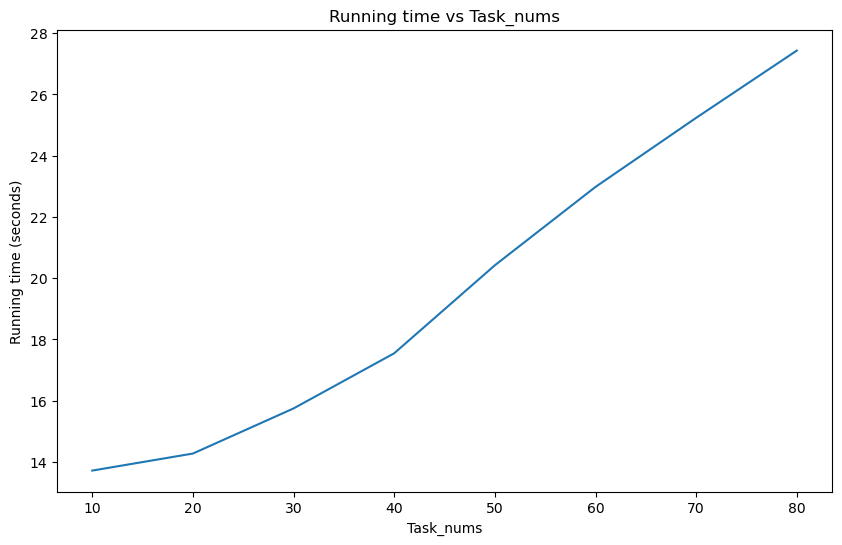

In [17]:
import os
import time
import subprocess

# Create a list of task_nums to test
task_nums_list = [10, 20, 30, 40, 50, 60, 70, 80]

# Create a list to store the running times
running_times = []

for task_nums in task_nums_list:
    # Run the Python file with the current task_nums
    start_time = time.time()
    subprocess.run(["python", "evo_sch_performance.py", str(task_nums)], check=True)
    end_time = time.time()
    
    # Calculate the running time and append it to the list
    running_time = end_time - start_time
    running_times.append(running_time)
    
    print(f"Task_nums: {task_nums}, Running time: {running_time:.2f} seconds")

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(task_nums_list, running_times)
plt.xlabel("Task_nums")
plt.ylabel("Running time (seconds)")
plt.title("Running time vs Task_nums")
plt.show()

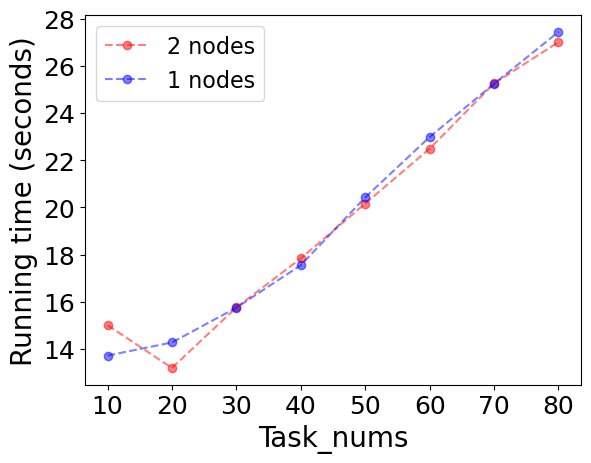

In [19]:
# Plot the results
# running_times_1nodes = running_times
import matplotlib.pyplot as plt
plt.figure()
plt.plot(task_nums_list, running_times_2nodes,marker='o', color='red', linestyle='--', label='2 nodes', alpha=0.5)
plt.plot(task_nums_list, running_times_1nodes,marker='o', color='blue', linestyle='--', label='1 nodes', alpha=0.5)
plt.legend(loc='upper left', fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Task_nums",fontsize=20)
plt.ylabel("Running time (seconds)",fontsize=20)
# plt.title("GA Running time vs Task nums",fontsize=20)
plt.show()

In [3]:
## predifined resources score
tq.evosch.hist_data.random_forest_train()
tq.evosch.hist_data.estimate_batch([predifine_ind])
tq.evosch.fitness(predifine_ind, all_node=True)
print(predifine_ind.score)

'train:run_calculator model'

'method: run_calculator, random forest regressor score: 0.9581566679174408'

'train:train model'

'method: train, random forest regressor score: 0.9497878149701859'

'train:evaluate model'

'train:run_sampling model'

'method: run_sampling, random forest regressor score: 0.9154976126383643'

-480.28092885017395


In [4]:
best_ind = tq.evosch.run_ga(100)
print(best_ind)

'train:run_calculator model'

'method: run_calculator, random forest regressor score: 0.9581566679174408'

'train:train model'

'method: train, random forest regressor score: 0.9497878149701859'

'train:evaluate model'

'train:run_sampling model'

'method: run_sampling, random forest regressor score: 0.9154976126383643'

"Starting GA with available tasks: {'run_calculator': ['7271c5f4-c8a5-4eeb-a565-ce1ff70ee197', '7d033b69-6974-4c93-b4d5-029bcfbacf89', 'e6b60572-5640-4afa-8b57-7e54e72d853e', '5f1bc92b-3e2b-4a1e-9d34-fd7255830efc', '5b098791-9c9f-469f-b270-d4c7bd05cc68', 'eab08b85-6fa8-440e-9d2c-9fe27b2234c4', '3dd43b50-9bb2-4fc1-88bc-c001b8129761', '030d66fc-76af-4657-a4d9-3ab121958991', 'e861b4ce-59ef-43d5-9c6b-7ca99f26b6d5', '12a2fac2-49e6-435b-b065-fa47626d1528', '7860597e-be33-4445-88ee-00797daccda6', '7a9464b8-bf98-440d-bdbb-25849fa64b95', 'cfa69881-1b95-44c8-aac1-60aee3a8ee01', '3ed46129-78a4-4522-ac2d-adbd3a30e0fe', '8000f8f2-31dd-433b-a180-b236eea45cd9', 'ca0239df-3870-41a4-8617-088292d84f1f', '1fe68e79-6181-41f4-8a74-51ed3c513966', '1c666824-a0ba-4929-a598-85303b29bb47', 'a5514fb2-6ac0-4e28-98b6-ed374c79755b', '33a5453f-c4ff-4576-9c27-04b1488c9859'], 'train': [], 'evaluate': [], 'run_sampling': []}"

'initial score is -873.3653047084808'

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


'sklearn.utils.validation._assert_all_finite: running accelerated version on CPU'

'Generation 0: -358.4481761455536'

'Generation 1: -358.4481761455536'

'Generation 2: -358.4481761455536'

'Generation 3: -358.4481761455536'

'Generation 4: -358.4481761455536'

'Generation 5: -358.4481761455536'

'Generation 6: -358.4481761455536'

'Generation 7: -358.4481761455536'

'Generation 8: -358.4481761455536'

'Generation 9: -358.4481761455536'

'Generation 10: -358.4481761455536'

'Generation 11: -358.4481761455536'

'Generation 12: -358.4481761455536'

'Generation 13: -358.4481761455536'

'Generation 14: -358.4481761455536'

'Generation 15: -358.4481761455536'

'Generation 16: -358.4481761455536'

'Generation 17: -358.4481761455536'

'Generation 18: -358.4481761455536'

'Generation 19: -358.4481761455536'

'Generation 20: -358.4481761455536'

'Generation 21: -358.4481761455536'

'Generation 22: -358.4481761455536'

'Generation 23: -358.4481761455536'

'Generation 24: -358.4481761455536'

'Generation 25: -358.4481761455536'

'Generation 26: -358.4481761455536'

'Generation 27: -358.4481761455536'

'Generation 28: -358.4481761455536'

'Generation 29: -358.4481761455536'

'Generation 30: -358.4481761455536'

'Generation 31: -358.4481761455536'

'Generation 32: -358.4481761455536'

'Generation 33: -358.4481761455536'

'Generation 34: -358.4481761455536'

'Generation 35: -358.4481761455536'

'Generation 36: -358.4481761455536'

'Generation 37: -358.4481761455536'

'Generation 38: -358.4481761455536'

'Generation 39: -358.4481761455536'

'Generation 40: -358.4481761455536'

'Generation 41: -358.4481761455536'

'Generation 42: -358.4481761455536'

'Generation 43: -358.4481761455536'

'Generation 44: -358.4481761455536'

'Generation 45: -358.4481761455536'

'Generation 46: -358.4481761455536'

'Generation 47: -358.4481761455536'

'Generation 48: -358.4481761455536'

'Generation 49: -358.4481761455536'

'Generation 50: -358.4481761455536'

'Generation 51: -358.4481761455536'

'Generation 52: -358.4481761455536'

'Generation 53: -358.4481761455536'

'Generation 54: -358.4481761455536'

'Generation 55: -358.4481761455536'

'Generation 56: -358.4481761455536'

'Generation 57: -358.4481761455536'

'Generation 58: -358.4481761455536'

'Generation 59: -358.4481761455536'

'Generation 60: -358.4481761455536'

'Generation 61: -358.4481761455536'

'Generation 62: -358.4481761455536'

'Generation 63: -358.4481761455536'

'Generation 64: -358.4481761455536'

'Generation 65: -358.4481761455536'

'Generation 66: -358.4481761455536'

'Generation 67: -358.4481761455536'

'Generation 68: -358.4481761455536'

'Generation 69: -358.4481761455536'

'Generation 70: -358.4481761455536'

'Generation 71: -358.4481761455536'

'Generation 72: -358.4481761455536'

'Generation 73: -358.4481761455536'

'Generation 74: -358.4481761455536'

'Generation 75: -358.4481761455536'

'Generation 76: -358.4481761455536'

'Generation 77: -358.4481761455536'

'Generation 78: -358.4481761455536'

'Generation 79: -358.4481761455536'

'Generation 80: -358.4481761455536'

'Generation 81: -358.4481761455536'

'Generation 82: -358.4481761455536'

'Generation 83: -358.4481761455536'

'Generation 84: -358.4481761455536'

'Generation 85: -358.4481761455536'

'Generation 86: -358.4481761455536'

'Generation 87: -358.4481761455536'

'Generation 88: -358.4481761455536'

'Generation 89: -358.4481761455536'

'Generation 90: -358.4481761455536'

'Generation 91: -358.4481761455536'

'Generation 92: -358.4481761455536'

'Generation 93: -358.4481761455536'

'Generation 94: -358.4481761455536'

'Generation 95: -358.4481761455536'

'Generation 96: -358.4481761455536'

'Generation 97: -358.4481761455536'

'Generation 98: -358.4481761455536'

'Generation 99: -358.4481761455536'

'score of all ind:[-358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -358.4481761455536, -

"Best ind:individual(individual_id=20204, tasks_nums={'run_calculator': 20, 'train': 0, 'evaluate': 0, 'run_sampling': 0}, total_resources={'cpu': 56, 'gpu': 4, 'memory': '128G'}, total_time=0, max_time=0, score=-358.4481761455536, predict_run_seq=[{'name': 'run_calculator', 'task_id': '12a2fac2-49e6-435b-b065-fa47626d1528', 'start_time': 1711040952.3539863, 'finish_time': 1711041310.8021624, 'total_runtime': 358.4481761455536, 'resources': {'cpu': 1}}, {'name': 'run_calculator', 'task_id': '5f1bc92b-3e2b-4a1e-9d34-fd7255830efc', 'start_time': 1711040952.3539863, 'finish_time': 1711041195.7127078, 'total_runtime': 243.35872149467468, 'resources': {'cpu': 6}}, {'name': 'run_calculator', 'task_id': '030d66fc-76af-4657-a4d9-3ab121958991', 'start_time': 1711040952.3539863, 'finish_time': 1711041245.2627015, 'total_runtime': 292.9087152481079, 'resources': {'cpu': 5}}, {'name': 'run_calculator', 'task_id': '7860597e-be33-4445-88ee-00797daccda6', 'start_time': 1711040952.3539863, 'finish_tim

individual(individual_id=20204, tasks_nums={'run_calculator': 20, 'train': 0, 'evaluate': 0, 'run_sampling': 0}, total_resources={'cpu': 56, 'gpu': 4, 'memory': '128G'}, total_time=0, max_time=0, score=-358.4481761455536, predict_run_seq=[{'name': 'run_calculator', 'task_id': '12a2fac2-49e6-435b-b065-fa47626d1528', 'start_time': 1711040952.3539863, 'finish_time': 1711041310.8021624, 'total_runtime': 358.4481761455536, 'resources': {'cpu': 1}}, {'name': 'run_calculator', 'task_id': '5f1bc92b-3e2b-4a1e-9d34-fd7255830efc', 'start_time': 1711040952.3539863, 'finish_time': 1711041195.7127078, 'total_runtime': 243.35872149467468, 'resources': {'cpu': 6}}, {'name': 'run_calculator', 'task_id': '030d66fc-76af-4657-a4d9-3ab121958991', 'start_time': 1711040952.3539863, 'finish_time': 1711041245.2627015, 'total_runtime': 292.9087152481079, 'resources': {'cpu': 5}}, {'name': 'run_calculator', 'task_id': '7860597e-be33-4445-88ee-00797daccda6', 'start_time': 1711040952.3539863, 'finish_time': 171104

In [5]:
task_allocation = best_ind.task_allocation
task_allocation.sort(key=lambda x:x['total_runtime'], reverse=True)
cpus = 0
for task in task_allocation:
    cpus += task['resources']['cpu']
    print(task["resources"],task["total_runtime"])
    
print(f"cost toatl cpu:{cpus}")



{'cpu': 1} 358.4481760846666
{'cpu': 2} 299.5212459472044
{'cpu': 5} 292.9087151354445
{'cpu': 1} 285.2688049357655
{'cpu': 1} 285.2688049357655
{'cpu': 3} 272.756118617515
{'cpu': 4} 272.70129784416423
{'cpu': 1} 270.3268304230463
{'cpu': 1} 270.3268304230463
{'cpu': 1} 270.3268304230463
{'cpu': 1} 260.2303486073963
{'cpu': 1} 260.2303486073963
{'cpu': 6} 243.35872156638055
{'cpu': 7} 209.20008061965964
{'cpu': 7} 209.20008061965964
{'cpu': 6} 167.66169149612543
{'cpu': 6} 166.34229022388973
{'cpu': 7} 154.72511513281816
{'cpu': 1} 143.1057245972799
{'cpu': 1} 136.14318593261822
cost toatl cpu:63


In [21]:
task_allocation = sorted(predifine_ind.predict_run_seq, key=lambda x:x['total_runtime'], reverse=True)
print(type(predifine_ind.predict_run_seq.sort(key=lambda x:x['total_runtime'], reverse=True)))

<class 'NoneType'>


In [9]:
print(8%2)

0
